<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [7]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [12]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


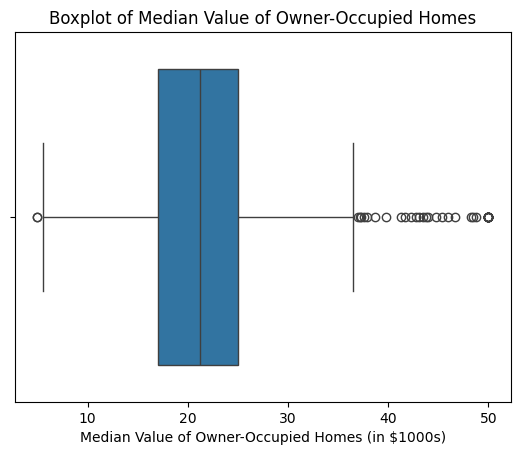

In [14]:
sns.boxplot(x=boston_df['MEDV'])

pyplot.xlabel('Median Value of Owner-Occupied Homes (in $1000s)')
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.show()

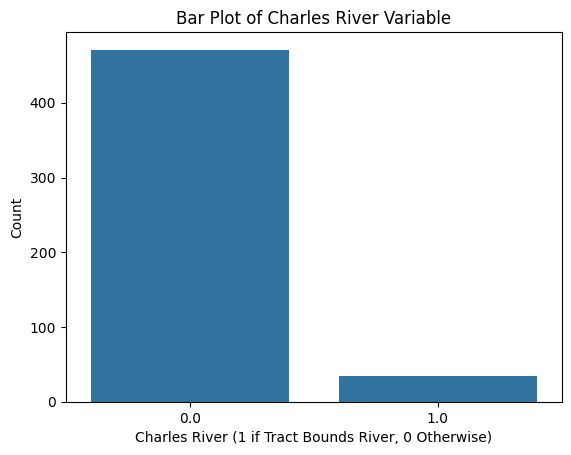

In [15]:
sns.countplot(x=boston_df['CHAS'])

pyplot.xlabel('Charles River (1 if Tract Bounds River, 0 Otherwise)')
pyplot.ylabel('Count')
pyplot.title('Bar Plot of Charles River Variable')
pyplot.show()

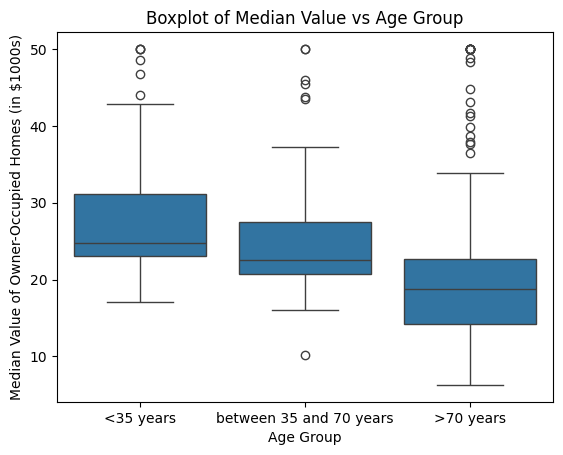

In [17]:
bins = [0, 35, 70, max(boston_df['AGE'])]
labels = ['<35 years', 'between 35 and 70 years', '>70 years']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)

pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Owner-Occupied Homes (in $1000s)')
pyplot.title('Boxplot of Median Value vs Age Group')
pyplot.show()

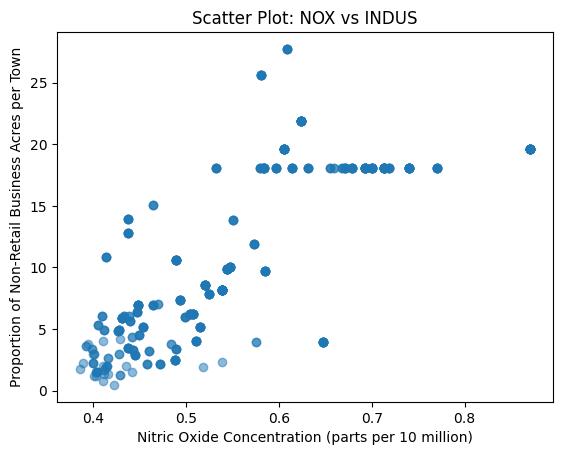

In [19]:
pyplot.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.5)

pyplot.xlabel('Nitric Oxide Concentration (parts per 10 million)')
pyplot.ylabel('Proportion of Non-Retail Business Acres per Town')
pyplot.title('Scatter Plot: NOX vs INDUS')
pyplot.show()

# it seems there's a tendency for areas with higher proportions of non-retail business acres per town to have higher nitric oxide concentrations, 
# although the relationship doesn't seem to be perfectly linear.

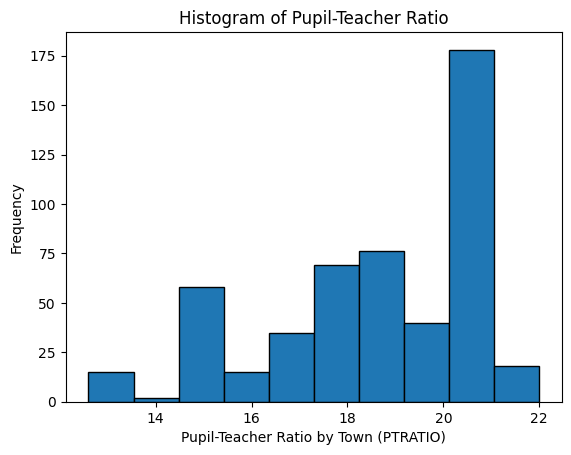

In [20]:
pyplot.hist(boston_df['PTRATIO'], bins=10, edgecolor='black')

pyplot.xlabel('Pupil-Teacher Ratio by Town (PTRATIO)')
pyplot.ylabel('Frequency')
pyplot.title('Histogram of Pupil-Teacher Ratio')
pyplot.show()

In [22]:
t_statistic, p_value = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in median values of houses.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in median values of houses.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject null hypothesis: There is a significant difference in median values of houses.


In [25]:
groups = []
for group, df_group in boston_df.groupby('AGE_group'):
    groups.append(df_group['MEDV'])

f_statistic, p_value = scipy.stats.f_oneway(*groups)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")

F-statistic: 30.566839914861454
P-value: 3.435569235360708e-13
Reject null hypothesis: There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.


In [26]:
pearson_corr, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson correlation coefficient:", pearson_corr)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant linear relationship between NOX and INDUS.")
else:
    print("Fail to reject null hypothesis: There is no significant linear relationship between NOX and INDUS.")

Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Reject null hypothesis: There is a significant linear relationship between NOX and INDUS.


In [28]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.21e-08
Time:                        20:48:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""